In [253]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import json
import requests
client = MongoClient("localhost:27017")
client.list_database_names()
db = client.get_database("Aliens")

In [254]:
db.list_collection_names()

['Pruebaaeropuertos', 'airportcollection', 'alienscollection', 'Prueba1']

In [3]:
collectionairports = db.get_collection("Pruebaaeropuertos")
collectionaliens = db.get_collection("Prueba1")

In [27]:
# Km que quiero  caminar
metros = 5000

In [5]:
coord = [-74.93,40.07]

In [6]:
def type_point(lista):
    return {"type":"Point", "coordinates": lista}

In [7]:
point = type_point(coord)
point

{'type': 'Point', 'coordinates': [-74.93, 40.07]}

In [10]:
collectionaliens.find_one().keys()

dict_keys(['_id', 'level_0', 'index', 'datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)', 'duration (hours/min)', 'comments', 'date posted', 'latitude', 'longitude', 'coordenadas', 'Point', 'geometry2'])

In [28]:
query = {"Point": {"$near": {"$geometry": point, "$maxDistance": metros}}}

In [29]:
list(collectionaliens.find(query))

[{'_id': ObjectId('61b9c5a9fbd846b891960510'),
  'level_0': 18972,
  'index': 23456,
  'datetime': datetime.datetime(2002, 12, 8, 0, 0),
  'city': 'croydon',
  'state': 'pa',
  'country': 'us',
  'shape': 'triangle',
  'duration (seconds)': '300',
  'duration (hours/min)': '5min',
  'comments': 'Triangle Shaped Object 3 White lights Red in Middle at times And Silent',
  'date posted': '12/23/2002',
  'latitude': 40.0872222,
  'longitude': -74.9038889,
  'coordenadas': [-74.9038889, 40.0872222],
  'Point': {'type': 'Point', 'coordinates': [-74.9038889, 40.0872222]},
  'geometry2': {'type': 'Point', 'coordinates': [-74.9038889, 40.0872222]}},
 {'_id': ObjectId('61b9c5a9fbd846b89195effe'),
  'level_0': 13578,
  'index': 16646,
  'datetime': datetime.datetime(2014, 1, 19, 0, 0),
  'city': 'delanco',
  'state': 'nj',
  'country': 'us',
  'shape': 'light',
  'duration (seconds)': '240',
  'duration (hours/min)': '4 minutes',
  'comments': 'Formation of silent orange lights moving across clea

In [30]:
a = list(collectionaliens.find(query))

In [31]:
len(a)

12

# Revision Aeropuertos 

In [32]:
collectionairports.find_one().keys()

dict_keys(['_id', 'type', 'name', 'latitude_deg', 'longitude_deg', 'elevation_ft', 'iso_country', 'coordenadas', 'geometry2'])

In [37]:
query2 = {"Point": {"$near": {"$geometry": point, "$maxDistance": metros}}}

In [148]:
list(collectionairports.find(query2))

[{'_id': ObjectId('61b9d7c07b46e1a45f485152'),
  'type': 'heliport',
  'name': 'Total Rf Heliport',
  'latitude_deg': 40.07080078125,
  'longitude_deg': -74.93360137939453,
  'elevation_ft': 11.0,
  'iso_country': 'US',
  'coordenadas': [-74.93360137939453, 40.07080078125],
  'geometry2': {'type': 'Point',
   'coordinates': [-74.93360137939453, 40.07080078125]},
  'Point': {'type': 'Point',
   'coordinates': [-74.93360137939453, 40.07080078125]}},
 {'_id': ObjectId('61b9d7c17b46e1a45f489f21'),
  'type': 'heliport',
  'name': 'Sterling Heliport',
  'latitude_deg': 40.081298828125,
  'longitude_deg': -74.89420318603516,
  'elevation_ft': 24.0,
  'iso_country': 'US',
  'coordenadas': [-74.89420318603516, 40.081298828125],
  'geometry2': {'type': 'Point',
   'coordinates': [-74.89420318603516, 40.081298828125]},
  'Point': {'type': 'Point',
   'coordinates': [-74.89420318603516, 40.081298828125]}},
 {'_id': ObjectId('61b9d7c07b46e1a45f485a47'),
  'type': 'heliport',
  'name': 'Frankford Ho

## Locuras

In [136]:
data2 = pd.read_csv("Puntosaeropuertos.csv")
data2.shape

(27261, 1)

In [137]:
data2["Point"] = data2["coordenadas"].apply(type_point)

In [69]:
d = "{'a': 'Hola'}"

In [138]:
import ast
ast.literal_eval(d)

{'a': 'Hola'}

In [139]:
data2.head()

,coordenadas,Point
0,"[-74.93360137939453, 40.07080078125]","{'type': 'Point', 'coordinates': '[-74.9336013..."
1,"[-101.473911, 38.704022]","{'type': 'Point', 'coordinates': '[-101.473911..."
2,"[-151.692524, 59.947733]","{'type': 'Point', 'coordinates': '[-151.692524..."
3,"[-86.77030181884766, 34.86479949951172]","{'type': 'Point', 'coordinates': '[-86.7703018..."
4,"[-91.254898, 35.6087]","{'type': 'Point', 'coordinates': '[-91.254898,..."


In [146]:
#Esto funciona
for i in range(len(data2)):
        data2.Point[i]['coordinates'] = ast.literal_eval(data2.Point[i]['coordinates'])

In [147]:
data2.head()

,coordenadas,Point
0,"[-74.93360137939453, 40.07080078125]","{'type': 'Point', 'coordinates': [-74.93360137..."
1,"[-101.473911, 38.704022]","{'type': 'Point', 'coordinates': [-101.473911,..."
2,"[-151.692524, 59.947733]","{'type': 'Point', 'coordinates': [-151.692524,..."
3,"[-86.77030181884766, 34.86479949951172]","{'type': 'Point', 'coordinates': [-86.77030181..."
4,"[-91.254898, 35.6087]","{'type': 'Point', 'coordinates': [-91.254898, ..."


In [61]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27261 entries, 0 to 27260
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Point   27261 non-null  object
dtypes: object(1)
memory usage: 213.1+ KB


In [160]:
data4 = pd.read_csv("airportwithpoint.csv")
data4.head()

,type,name,latitude_deg,longitude_deg,elevation_ft,iso_country,coordenadas,geometry2,Point
0,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,US,"[-74.93360137939453, 40.07080078125]","{'type': 'Point', 'coordinates': (-74.93360137...","{'type': 'Point', 'coordinates': [-74.93360137..."
1,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,US,"[-101.473911, 38.704022]","{'type': 'Point', 'coordinates': (-101.473911,...","{'type': 'Point', 'coordinates': [-101.473911,..."
2,small_airport,Lowell Field,59.947733,-151.692524,450.0,US,"[-151.692524, 59.947733]","{'type': 'Point', 'coordinates': (-151.692524,...","{'type': 'Point', 'coordinates': [-151.692524,..."
3,small_airport,Epps Airpark,34.864799,-86.770302,820.0,US,"[-86.77030181884766, 34.86479949951172]","{'type': 'Point', 'coordinates': (-86.77030181...","{'type': 'Point', 'coordinates': [-86.77030181..."
4,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,US,"[-91.254898, 35.6087]","{'type': 'Point', 'coordinates': (-91.254898, ...","{'type': 'Point', 'coordinates': [-91.254898, ..."


In [164]:
data4["coordenadas2"] = data4["coordenadas"].apply(type_point)

In [166]:
data4.head()

,type,name,latitude_deg,longitude_deg,elevation_ft,iso_country,coordenadas,geometry2,Point,coordenadas2
0,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,US,"[-74.93360137939453, 40.07080078125]","{'type': 'Point', 'coordinates': (-74.93360137...","{'type': 'Point', 'coordinates': [-74.93360137...","{'type': 'Point', 'coordinates': '[-74.9336013..."
1,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,US,"[-101.473911, 38.704022]","{'type': 'Point', 'coordinates': (-101.473911,...","{'type': 'Point', 'coordinates': [-101.473911,...","{'type': 'Point', 'coordinates': '[-101.473911..."
2,small_airport,Lowell Field,59.947733,-151.692524,450.0,US,"[-151.692524, 59.947733]","{'type': 'Point', 'coordinates': (-151.692524,...","{'type': 'Point', 'coordinates': [-151.692524,...","{'type': 'Point', 'coordinates': '[-151.692524..."
3,small_airport,Epps Airpark,34.864799,-86.770302,820.0,US,"[-86.77030181884766, 34.86479949951172]","{'type': 'Point', 'coordinates': (-86.77030181...","{'type': 'Point', 'coordinates': [-86.77030181...","{'type': 'Point', 'coordinates': '[-86.7703018..."
4,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,US,"[-91.254898, 35.6087]","{'type': 'Point', 'coordinates': (-91.254898, ...","{'type': 'Point', 'coordinates': [-91.254898, ...","{'type': 'Point', 'coordinates': '[-91.254898,..."


In [168]:
for i in range(len(data4)):
        data4.coordenadas2[i]['coordinates'] = ast.literal_eval(data4.coordenadas2[i]['coordinates'])

## Sucesos cerca de aeropuertos FUNCIONA

In [171]:
a = []
for i,row in data2.iterrows():
    origen = row["Point"]
    query4 = {"Point": {"$near": {"$geometry":origen, "$maxDistance": metros}}}
    a.append(list(collectionaliens.find(query4)))


In [172]:
len(a)

27261

In [240]:
len(d)

27261

In [179]:
a[0]

[{'_id': ObjectId('61b9c5a9fbd846b89195effe'),
  'level_0': 13578,
  'index': 16646,
  'datetime': datetime.datetime(2014, 1, 19, 0, 0),
  'city': 'delanco',
  'state': 'nj',
  'country': 'us',
  'shape': 'light',
  'duration (seconds)': '240',
  'duration (hours/min)': '4 minutes',
  'comments': 'Formation of silent orange lights moving across clear sky.',
  'date posted': '1/24/2014',
  'latitude': 40.0505556,
  'longitude': -74.9538889,
  'coordenadas': [-74.9538889, 40.0505556],
  'Point': {'type': 'Point', 'coordinates': [-74.9538889, 40.0505556]},
  'geometry2': {'type': 'Point', 'coordinates': [-74.9538889, 40.0505556]}},
 {'_id': ObjectId('61b9c5a9fbd846b891960510'),
  'level_0': 18972,
  'index': 23456,
  'datetime': datetime.datetime(2002, 12, 8, 0, 0),
  'city': 'croydon',
  'state': 'pa',
  'country': 'us',
  'shape': 'triangle',
  'duration (seconds)': '300',
  'duration (hours/min)': '5min',
  'comments': 'Triangle Shaped Object 3 White lights Red in Middle at times And S

In [241]:
d[0]

[{'_id': ObjectId('61b9c5a9fbd846b89195effe'),
  'level_0': 13578,
  'index': 16646,
  'datetime': datetime.datetime(2014, 1, 19, 0, 0),
  'city': 'delanco',
  'state': 'nj',
  'country': 'us',
  'shape': 'light',
  'duration (seconds)': '240',
  'duration (hours/min)': '4 minutes',
  'comments': 'Formation of silent orange lights moving across clear sky.',
  'date posted': '1/24/2014',
  'latitude': 40.0505556,
  'longitude': -74.9538889,
  'coordenadas': [-74.9538889, 40.0505556],
  'Point': {'type': 'Point', 'coordinates': [-74.9538889, 40.0505556]},
  'geometry2': {'type': 'Point', 'coordinates': [-74.9538889, 40.0505556]}},
 {'_id': ObjectId('61b9c5a9fbd846b891960510'),
  'level_0': 18972,
  'index': 23456,
  'datetime': datetime.datetime(2002, 12, 8, 0, 0),
  'city': 'croydon',
  'state': 'pa',
  'country': 'us',
  'shape': 'triangle',
  'duration (seconds)': '300',
  'duration (hours/min)': '5min',
  'comments': 'Triangle Shaped Object 3 White lights Red in Middle at times And S

In [173]:
data4["Diccionarioeventos"] = a

In [178]:
data4.head(10)

,type,name,latitude_deg,longitude_deg,elevation_ft,iso_country,coordenadas,geometry2,Point,coordenadas2,Diccionarioeventos
0,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,US,"[-74.93360137939453, 40.07080078125]","{'type': 'Point', 'coordinates': (-74.93360137...","{'type': 'Point', 'coordinates': [-74.93360137...","{'type': 'Point', 'coordinates': [-74.93360137...","[{'_id': 61b9c5a9fbd846b89195effe, 'level_0': ..."
1,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,US,"[-101.473911, 38.704022]","{'type': 'Point', 'coordinates': (-101.473911,...","{'type': 'Point', 'coordinates': [-101.473911,...","{'type': 'Point', 'coordinates': [-101.473911,...",[]
2,small_airport,Lowell Field,59.947733,-151.692524,450.0,US,"[-151.692524, 59.947733]","{'type': 'Point', 'coordinates': (-151.692524,...","{'type': 'Point', 'coordinates': [-151.692524,...","{'type': 'Point', 'coordinates': [-151.692524,...",[]
3,small_airport,Epps Airpark,34.864799,-86.770302,820.0,US,"[-86.77030181884766, 34.86479949951172]","{'type': 'Point', 'coordinates': (-86.77030181...","{'type': 'Point', 'coordinates': [-86.77030181...","{'type': 'Point', 'coordinates': [-86.77030181...","[{'_id': 61b9c5a9fbd846b8919605a1, 'level_0': ..."
4,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,US,"[-91.254898, 35.6087]","{'type': 'Point', 'coordinates': (-91.254898, ...","{'type': 'Point', 'coordinates': [-91.254898, ...","{'type': 'Point', 'coordinates': [-91.254898, ...","[{'_id': 61b9c5a9fbd846b89195f643, 'level_0': ..."
5,small_airport,Fulton Airport,34.942803,-97.818019,1100.0,US,"[-97.8180194, 34.9428028]","{'type': 'Point', 'coordinates': (-97.8180194,...","{'type': 'Point', 'coordinates': [-97.8180194,...","{'type': 'Point', 'coordinates': [-97.8180194,...",[]
6,small_airport,Cordes Airport,34.305599,-112.165001,3810.0,US,"[-112.16500091552734, 34.305599212646484]","{'type': 'Point', 'coordinates': (-112.1650009...","{'type': 'Point', 'coordinates': [-112.1650009...","{'type': 'Point', 'coordinates': [-112.1650009...","[{'_id': 61b9c5a9fbd846b8919607c1, 'level_0': ..."
7,small_airport,Goldstone (GTS) Airport,35.354740,-116.885329,3038.0,US,"[-116.885329, 35.35474]","{'type': 'Point', 'coordinates': (-116.885329,...","{'type': 'Point', 'coordinates': [-116.885329,...","{'type': 'Point', 'coordinates': [-116.885329,...",[]
8,small_airport,Williams Ag Airport,39.427188,-121.763427,87.0,US,"[-121.763427, 39.427188]","{'type': 'Point', 'coordinates': (-121.763427,...","{'type': 'Point', 'coordinates': [-121.763427,...","{'type': 'Point', 'coordinates': [-121.763427,...","[{'_id': 61b9c5a9fbd846b89196187c, 'level_0': ..."
9,heliport,Kitchen Creek Helibase Heliport,32.727374,-116.459742,3350.0,US,"[-116.4597417, 32.7273736]","{'type': 'Point', 'coordinates': (-116.4597417...","{'type': 'Point', 'coordinates': [-116.4597417...","{'type': 'Point', 'coordinates': [-116.4597417...",[]


In [185]:
g= []
for i in range(len(data4["Diccionarioeventos"])):
    g.append(len(data4["Diccionarioeventos"][i]))

In [187]:
len(g)

27261

In [189]:
data4["n_eventos"] = g

In [211]:
data4.head()

,type,name,latitude_deg,longitude_deg,elevation_ft,iso_country,coordenadas,geometry2,Point,coordenadas2,Diccionarioeventos,n_eventos
0,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,US,"[-74.93360137939453, 40.07080078125]","{'type': 'Point', 'coordinates': (-74.93360137...","{'type': 'Point', 'coordinates': [-74.93360137...","{'type': 'Point', 'coordinates': [-74.93360137...","[{'_id': 61b9c5a9fbd846b89195effe, 'level_0': ...",12
1,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,US,"[-101.473911, 38.704022]","{'type': 'Point', 'coordinates': (-101.473911,...","{'type': 'Point', 'coordinates': [-101.473911,...","{'type': 'Point', 'coordinates': [-101.473911,...",[],0
2,small_airport,Lowell Field,59.947733,-151.692524,450.0,US,"[-151.692524, 59.947733]","{'type': 'Point', 'coordinates': (-151.692524,...","{'type': 'Point', 'coordinates': [-151.692524,...","{'type': 'Point', 'coordinates': [-151.692524,...",[],0
3,small_airport,Epps Airpark,34.864799,-86.770302,820.0,US,"[-86.77030181884766, 34.86479949951172]","{'type': 'Point', 'coordinates': (-86.77030181...","{'type': 'Point', 'coordinates': [-86.77030181...","{'type': 'Point', 'coordinates': [-86.77030181...","[{'_id': 61b9c5a9fbd846b8919605a1, 'level_0': ...",5
4,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,US,"[-91.254898, 35.6087]","{'type': 'Point', 'coordinates': (-91.254898, ...","{'type': 'Point', 'coordinates': [-91.254898, ...","{'type': 'Point', 'coordinates': [-91.254898, ...","[{'_id': 61b9c5a9fbd846b89195f643, 'level_0': ...",2


In [243]:
aeroconsucesos = data4

In [607]:
eventos_aeropuerto = aeroconsucesos["n_eventos"].value_counts().to_frame()

In [608]:
eventos_aeropuerto = eventos_aeropuerto.reset_index()

In [612]:
eventos_aeropuerto[0:11]

,index,n_eventos
0,0,16918
1,1,2593
2,2,1402
3,3,932
4,4,784
5,5,492
6,6,404
7,7,336
8,9,241
9,8,235


In [ ]:
filmvalores = df["Film"].value_counts().to_frame()

# Cada suceso cuantos aeropuertos

In [209]:
data8 = pd.read_csv("F_usacases.csv")
data8.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,coordenadas,Point,geometry,geometry2
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,"[-97.9411111, 29.8830556]","{'type': 'Point', 'coordinates': [-97.9411111,...",POINT (-97.9411111 29.8830556),"{'type': 'Point', 'coordinates': (-97.9411111,..."
1,1956-10-10,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,"[-96.6458333, 28.9783333]","{'type': 'Point', 'coordinates': [-96.6458333,...",POINT (-96.64583330000001 28.9783333),"{'type': 'Point', 'coordinates': (-96.6458333,..."
2,1960-10-10,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,"[-157.8036111, 21.4180556]","{'type': 'Point', 'coordinates': [-157.8036111...",POINT (-157.8036111 21.4180556),"{'type': 'Point', 'coordinates': (-157.8036111..."
3,1961-10-10,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,"[-82.1888889, 36.595]","{'type': 'Point', 'coordinates': [-82.1888889,...",POINT (-82.18888889999999 36.595),"{'type': 'Point', 'coordinates': (-82.1888889,..."
4,1965-10-10,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333,"[-73.4083333, 41.1175]","{'type': 'Point', 'coordinates': [-73.4083333,...",POINT (-73.4083333 41.1175),"{'type': 'Point', 'coordinates': (-73.4083333,..."


In [216]:
def type_point(lista):
    return {"type":"Point", "coordinates":lista}

In [217]:
data8["Point2"] = data8["coordenadas"].apply(type_point)

In [218]:
data8.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,coordenadas,Point,geometry,geometry2,Point2
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,"[-97.9411111, 29.8830556]","{'type': 'Point', 'coordinates': [-97.9411111,...",POINT (-97.9411111 29.8830556),"{'type': 'Point', 'coordinates': (-97.9411111,...","{'type': 'Point', 'coordinates': '[-97.9411111..."
1,1956-10-10,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,"[-96.6458333, 28.9783333]","{'type': 'Point', 'coordinates': [-96.6458333,...",POINT (-96.64583330000001 28.9783333),"{'type': 'Point', 'coordinates': (-96.6458333,...","{'type': 'Point', 'coordinates': '[-96.6458333..."
2,1960-10-10,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,"[-157.8036111, 21.4180556]","{'type': 'Point', 'coordinates': [-157.8036111...",POINT (-157.8036111 21.4180556),"{'type': 'Point', 'coordinates': (-157.8036111...","{'type': 'Point', 'coordinates': '[-157.803611..."
3,1961-10-10,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,"[-82.1888889, 36.595]","{'type': 'Point', 'coordinates': [-82.1888889,...",POINT (-82.18888889999999 36.595),"{'type': 'Point', 'coordinates': (-82.1888889,...","{'type': 'Point', 'coordinates': '[-82.1888889..."
4,1965-10-10,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333,"[-73.4083333, 41.1175]","{'type': 'Point', 'coordinates': [-73.4083333,...",POINT (-73.4083333 41.1175),"{'type': 'Point', 'coordinates': (-73.4083333,...","{'type': 'Point', 'coordinates': '[-73.4083333..."


In [220]:
for i in range(len(data8)):
        data8.Point2[i]['coordinates'] = ast.literal_eval(data8.Point2[i]['coordinates'])

In [221]:
data8.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,coordenadas,Point,geometry,geometry2,Point2
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,"[-97.9411111, 29.8830556]","{'type': 'Point', 'coordinates': [-97.9411111,...",POINT (-97.9411111 29.8830556),"{'type': 'Point', 'coordinates': (-97.9411111,...","{'type': 'Point', 'coordinates': [-97.9411111,..."
1,1956-10-10,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,"[-96.6458333, 28.9783333]","{'type': 'Point', 'coordinates': [-96.6458333,...",POINT (-96.64583330000001 28.9783333),"{'type': 'Point', 'coordinates': (-96.6458333,...","{'type': 'Point', 'coordinates': [-96.6458333,..."
2,1960-10-10,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,"[-157.8036111, 21.4180556]","{'type': 'Point', 'coordinates': [-157.8036111...",POINT (-157.8036111 21.4180556),"{'type': 'Point', 'coordinates': (-157.8036111...","{'type': 'Point', 'coordinates': [-157.8036111..."
3,1961-10-10,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,"[-82.1888889, 36.595]","{'type': 'Point', 'coordinates': [-82.1888889,...",POINT (-82.18888889999999 36.595),"{'type': 'Point', 'coordinates': (-82.1888889,...","{'type': 'Point', 'coordinates': [-82.1888889,..."
4,1965-10-10,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333,"[-73.4083333, 41.1175]","{'type': 'Point', 'coordinates': [-73.4083333,...",POINT (-73.4083333 41.1175),"{'type': 'Point', 'coordinates': (-73.4083333,...","{'type': 'Point', 'coordinates': [-73.4083333,..."


In [222]:
z = []
for i,row in data8.iterrows():
    origen2 = row["Point2"]
    query4 = {"Point": {"$near": {"$geometry":origen2, "$maxDistance": metros}}}
    z.append(list(collectionairports.find(query4)))

In [ ]:
t = []
for i,row in data8.iterrows():
    origen2 = row["Point2"]
    query4 = {"Point": {"$near": {"$geometry":origen2, "$maxDistance": metros}}}
    z.append(list(collectionairports.find(query4)))

In [601]:
lista

KeyError: 'coordinates'

In [223]:
len(z)

51905

In [597]:
z[20000][0]["coordenadas"]

[-117.86799621582033, 33.75360107421875]

In [231]:
data8["Diccionarioaeropuerts"] = z

In [ ]:
data8.head()

In [233]:
x= []
for i in range(len(data8["Diccionarioaeropuerts"])):
    x.append(len(data8["Diccionarioaeropuerts"][i]))

In [234]:
len(x)

51905

In [235]:
data8["n_aeropuertos"] = x

In [242]:
data8.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,coordenadas,Point,geometry,geometry2,Point2,Diccionarioaeropuerts,n_aeropuertos
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,"[-97.9411111, 29.8830556]","{'type': 'Point', 'coordinates': [-97.9411111,...",POINT (-97.9411111 29.8830556),"{'type': 'Point', 'coordinates': (-97.9411111,...","{'type': 'Point', 'coordinates': [-97.9411111,...","[{'_id': 61b9d7c17b46e1a45f48abc9, 'type': 'cl...",3
1,1956-10-10,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,"[-96.6458333, 28.9783333]","{'type': 'Point', 'coordinates': [-96.6458333,...",POINT (-96.64583330000001 28.9783333),"{'type': 'Point', 'coordinates': (-96.6458333,...","{'type': 'Point', 'coordinates': [-96.6458333,...","[{'_id': 61b9d7c17b46e1a45f48b026, 'type': 'he...",2
2,1960-10-10,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,"[-157.8036111, 21.4180556]","{'type': 'Point', 'coordinates': [-157.8036111...",POINT (-157.8036111 21.4180556),"{'type': 'Point', 'coordinates': (-157.8036111...","{'type': 'Point', 'coordinates': [-157.8036111...",[],0
3,1961-10-10,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,"[-82.1888889, 36.595]","{'type': 'Point', 'coordinates': [-82.1888889,...",POINT (-82.18888889999999 36.595),"{'type': 'Point', 'coordinates': (-82.1888889,...","{'type': 'Point', 'coordinates': [-82.1888889,...","[{'_id': 61b9d7c17b46e1a45f486c2c, 'type': 'he...",2
4,1965-10-10,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333,"[-73.4083333, 41.1175]","{'type': 'Point', 'coordinates': [-73.4083333,...",POINT (-73.4083333 41.1175),"{'type': 'Point', 'coordinates': (-73.4083333,...","{'type': 'Point', 'coordinates': [-73.4083333,...","[{'_id': 61b9d7c17b46e1a45f486a93, 'type': 'he...",5


In [245]:
sucesosconaeropuertos = data8

In [246]:
sucesosconaeropuertos.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,coordenadas,Point,geometry,geometry2,Point2,Diccionarioaeropuerts,n_aeropuertos
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,"[-97.9411111, 29.8830556]","{'type': 'Point', 'coordinates': [-97.9411111,...",POINT (-97.9411111 29.8830556),"{'type': 'Point', 'coordinates': (-97.9411111,...","{'type': 'Point', 'coordinates': [-97.9411111,...","[{'_id': 61b9d7c17b46e1a45f48abc9, 'type': 'cl...",3
1,1956-10-10,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,"[-96.6458333, 28.9783333]","{'type': 'Point', 'coordinates': [-96.6458333,...",POINT (-96.64583330000001 28.9783333),"{'type': 'Point', 'coordinates': (-96.6458333,...","{'type': 'Point', 'coordinates': [-96.6458333,...","[{'_id': 61b9d7c17b46e1a45f48b026, 'type': 'he...",2
2,1960-10-10,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,"[-157.8036111, 21.4180556]","{'type': 'Point', 'coordinates': [-157.8036111...",POINT (-157.8036111 21.4180556),"{'type': 'Point', 'coordinates': (-157.8036111...","{'type': 'Point', 'coordinates': [-157.8036111...",[],0
3,1961-10-10,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,"[-82.1888889, 36.595]","{'type': 'Point', 'coordinates': [-82.1888889,...",POINT (-82.18888889999999 36.595),"{'type': 'Point', 'coordinates': (-82.1888889,...","{'type': 'Point', 'coordinates': [-82.1888889,...","[{'_id': 61b9d7c17b46e1a45f486c2c, 'type': 'he...",2
4,1965-10-10,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333,"[-73.4083333, 41.1175]","{'type': 'Point', 'coordinates': [-73.4083333,...",POINT (-73.4083333 41.1175),"{'type': 'Point', 'coordinates': (-73.4083333,...","{'type': 'Point', 'coordinates': [-73.4083333,...","[{'_id': 61b9d7c17b46e1a45f486a93, 'type': 'he...",5


In [237]:
data8["n_aeropuertos"].value_counts()

1      13167
0       9945
2       9876
3       6139
4       3099
5       2474
6       1369
11      1225
9       1158
7        948
12       517
16       499
109      323
10       314
20       294
8        272
29        65
17        45
13        40
23        39
18        20
25        17
27        17
14        15
15         9
24         8
55         4
21         4
35         2
42         1
Name: n_aeropuertos, dtype: int64

# GEONEAR

### Probando geoNear para sacar la distancia a cada suceso desde el aeropuerto más cercano

In [247]:
# Para cada sucesos, averiguo a qué distancia está el aeropuerto más cercano

In [266]:
sucesosconaeropuertos.head(1)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,coordenadas,Point,geometry,geometry2,Point2,Diccionarioaeropuerts,n_aeropuertos
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,"[-97.9411111, 29.8830556]","{'type': 'Point', 'coordinates': [-97.9411111,...",POINT (-97.9411111 29.8830556),"{'type': 'Point', 'coordinates': (-97.9411111,...","{'type': 'Point', 'coordinates': [-97.9411111,...","[{'_id': 61b9d7c17b46e1a45f48abc9, 'type': 'cl...",3


In [319]:
lista= []
for i, row in sucesosconaeropuertos.iterrows():
    lista.append([row["longitude"],row["latitude"]])
    

In [320]:
lista[0:5]

[[-97.9411111, 29.8830556],
 [-96.6458333, 28.9783333],
 [-157.8036111, 21.4180556],
 [-82.1888889, 36.595],
 [-73.4083333, 41.1175]]

In [321]:
sucesosconaeropuertos["nuevascoord"] = lista

In [322]:
sucesosconaeropuertos.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,coordenadas,Point,geometry,geometry2,Point2,Diccionarioaeropuerts,n_aeropuertos,nuevascoord
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,"[-97.9411111, 29.8830556]","{'type': 'Point', 'coordinates': [-97.9411111,...",POINT (-97.9411111 29.8830556),"{'type': 'Point', 'coordinates': (-97.9411111,...","{'type': 'Point', 'coordinates': [-97.9411111,...","[{'_id': 61b9d7c17b46e1a45f48abc9, 'type': 'cl...",3,"[-97.9411111, 29.8830556]"
1,1956-10-10,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,"[-96.6458333, 28.9783333]","{'type': 'Point', 'coordinates': [-96.6458333,...",POINT (-96.64583330000001 28.9783333),"{'type': 'Point', 'coordinates': (-96.6458333,...","{'type': 'Point', 'coordinates': [-96.6458333,...","[{'_id': 61b9d7c17b46e1a45f48b026, 'type': 'he...",2,"[-96.6458333, 28.9783333]"
2,1960-10-10,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,"[-157.8036111, 21.4180556]","{'type': 'Point', 'coordinates': [-157.8036111...",POINT (-157.8036111 21.4180556),"{'type': 'Point', 'coordinates': (-157.8036111...","{'type': 'Point', 'coordinates': [-157.8036111...",[],0,"[-157.8036111, 21.4180556]"
3,1961-10-10,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,"[-82.1888889, 36.595]","{'type': 'Point', 'coordinates': [-82.1888889,...",POINT (-82.18888889999999 36.595),"{'type': 'Point', 'coordinates': (-82.1888889,...","{'type': 'Point', 'coordinates': [-82.1888889,...","[{'_id': 61b9d7c17b46e1a45f486c2c, 'type': 'he...",2,"[-82.1888889, 36.595]"
4,1965-10-10,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333,"[-73.4083333, 41.1175]","{'type': 'Point', 'coordinates': [-73.4083333,...",POINT (-73.4083333 41.1175),"{'type': 'Point', 'coordinates': (-73.4083333,...","{'type': 'Point', 'coordinates': [-73.4083333,...","[{'_id': 61b9d7c17b46e1a45f486a93, 'type': 'he...",5,"[-73.4083333, 41.1175]"


In [357]:
cercano = []
for i,row in sucesosconaeropuertos.iterrows():
    origen = row["nuevascoord"]
    query5 =[{"$geoNear":{"near": origen,"distanceField": "far","minDistance": 2,"spherical": True}}]

    cercano.append(collectionairports.aggregate(query5))
    #query4 = {"Point": {"$geoNear": {"$geometry":origen, "$maxDistance": metros}}}

In [358]:
cercano

 ...]

In [564]:
list(cercano[4])

[]

In [263]:
query5 ={"$geoNear":{"near": { type: "Point", "coordinates":point},"distanceField": "dist.calculated","minDistance": 2,"includeLocs": "dist.location","spherical": True}}



In [287]:
origen = sucesosconaeropuertos.iloc[0]["coordenadas"]

In [581]:
 origen = sucesosconaeropuertos.iloc[1]["nuevascoord"]

In [565]:
query5 =[{"$geoNear":{"near": origen,"distanceField": "far","maxDistance": 500,"spherical": True}}]

In [587]:
query6 =[{"$geoNear":{"near": origen,"distanceField": "far","minDistance": 0.1,"spherical": True}}]


In [566]:
query5

[{'$geoNear': {'near': [-96.6458333, 28.9783333],
   'distanceField': 'far',
   'maxDistance': 500,
   'spherical': True}}]

In [588]:
query6

[{'$geoNear': {'near': [-96.6458333, 28.9783333],
   'distanceField': 'far',
   'minDistance': 0.1,
   'spherical': True}}]

In [594]:
aceituna = collectionairports.aggregate(query6)

In [595]:
aceituna

In [596]:
list(aceituna)

[{'_id': ObjectId('61b9d7c17b46e1a45f488abb'),
  'type': 'small_airport',
  'name': 'Frederick Regional Airport',
  'latitude_deg': 34.35200119,
  'longitude_deg': -98.98390198,
  'elevation_ft': 1258.0,
  'iso_country': 'US',
  'coordenadas': [-98.98390198, 34.35200119],
  'geometry2': {'type': 'Point', 'coordinates': [-98.98390198, 34.35200119]},
  'Point': {'type': 'Point', 'coordinates': [-98.98390198, 34.35200119]},
  'far': 0.10000301323276675},
 {'_id': ObjectId('61b9d7c27b46e1a45f48b4d8'),
  'type': 'closed',
  'name': 'Fort Stockton South Airport',
  'latitude_deg': 30.86877,
  'longitude_deg': -102.88819,
  'elevation_ft': 3002.0,
  'iso_country': 'US',
  'coordenadas': [-102.88819, 30.86877],
  'geometry2': {'type': 'Point', 'coordinates': [-102.88819, 30.86877]},
  'Point': {'type': 'Point', 'coordinates': [-102.88819, 30.86877]},
  'far': 0.10000523355660892},
 {'_id': ObjectId('61b9d7c17b46e1a45f489cca'),
  'type': 'heliport',
  'name': 'Pauls Valley State School Heliport

In [513]:
sucesosconaeropuertos.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,coordenadas,Point,geometry,geometry2,Point2,Diccionarioaeropuerts,n_aeropuertos,nuevascoord
0,1949-10-10,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,"[-97.9411111, 29.8830556]","{'type': 'Point', 'coordinates': [-97.9411111,...",POINT (-97.9411111 29.8830556),"{'type': 'Point', 'coordinates': (-97.9411111,...","{'type': 'Point', 'coordinates': [-97.9411111,...","[{'_id': 61b9d7c17b46e1a45f48abc9, 'type': 'cl...",3,"[-97.9411111, 29.8830556]"
1,1956-10-10,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,"[-96.6458333, 28.9783333]","{'type': 'Point', 'coordinates': [-96.6458333,...",POINT (-96.64583330000001 28.9783333),"{'type': 'Point', 'coordinates': (-96.6458333,...","{'type': 'Point', 'coordinates': [-96.6458333,...","[{'_id': 61b9d7c17b46e1a45f48b026, 'type': 'he...",2,"[-96.6458333, 28.9783333]"
2,1960-10-10,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,"[-157.8036111, 21.4180556]","{'type': 'Point', 'coordinates': [-157.8036111...",POINT (-157.8036111 21.4180556),"{'type': 'Point', 'coordinates': (-157.8036111...","{'type': 'Point', 'coordinates': [-157.8036111...",[],0,"[-157.8036111, 21.4180556]"
3,1961-10-10,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,"[-82.1888889, 36.595]","{'type': 'Point', 'coordinates': [-82.1888889,...",POINT (-82.18888889999999 36.595),"{'type': 'Point', 'coordinates': (-82.1888889,...","{'type': 'Point', 'coordinates': [-82.1888889,...","[{'_id': 61b9d7c17b46e1a45f486c2c, 'type': 'he...",2,"[-82.1888889, 36.595]"
4,1965-10-10,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333,"[-73.4083333, 41.1175]","{'type': 'Point', 'coordinates': [-73.4083333,...",POINT (-73.4083333 41.1175),"{'type': 'Point', 'coordinates': (-73.4083333,...","{'type': 'Point', 'coordinates': [-73.4083333,...","[{'_id': 61b9d7c17b46e1a45f486a93, 'type': 'he...",5,"[-73.4083333, 41.1175]"


countplot y = count x = Número de aeropuertos 

In [618]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

Text(0.5, 0, 'Avistamientos por aeropuerto')

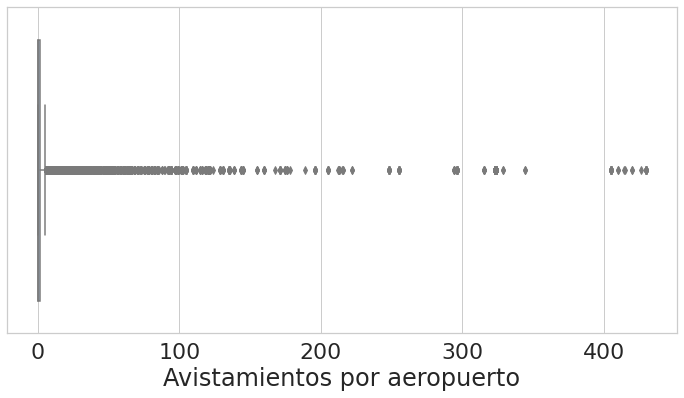

In [622]:
eventosaeropuert = sns.boxplot(x=data4["n_eventos"],data = data4)
sns.set(font_scale = 2,style="whitegrid", palette="pastel")
plt.xlabel('Avistamientos por aeropuerto')

In [626]:
eventosaeropuert.figure.savefig("eventosaeropuert.png")

Text(0.5, 0, 'Aeropuertos por avistamientos')

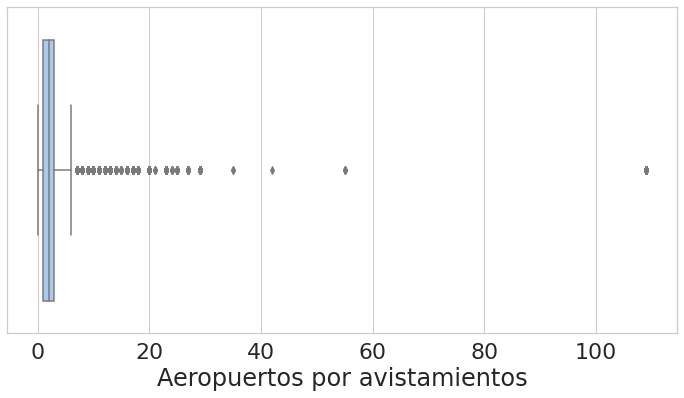

In [624]:
aeropuertosporavistamiento = sns.boxplot(x=data8["n_aeropuertos"],data = data8)
sns.set(font_scale = 2,style="whitegrid", palette="pastel")
plt.xlabel('Aeropuertos por avistamientos')

In [627]:
aeropuertosporavistamiento.figure.savefig("aeropuertosporavistamiento.png")

In [615]:
data4

,type,name,latitude_deg,longitude_deg,elevation_ft,iso_country,coordenadas,geometry2,Point,coordenadas2,Diccionarioeventos,n_eventos
0,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,US,"[-74.93360137939453, 40.07080078125]","{'type': 'Point', 'coordinates': (-74.93360137...","{'type': 'Point', 'coordinates': [-74.93360137...","{'type': 'Point', 'coordinates': [-74.93360137...","[{'_id': 61b9c5a9fbd846b89195effe, 'level_0': ...",12
1,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,US,"[-101.473911, 38.704022]","{'type': 'Point', 'coordinates': (-101.473911,...","{'type': 'Point', 'coordinates': [-101.473911,...","{'type': 'Point', 'coordinates': [-101.473911,...",[],0
2,small_airport,Lowell Field,59.947733,-151.692524,450.0,US,"[-151.692524, 59.947733]","{'type': 'Point', 'coordinates': (-151.692524,...","{'type': 'Point', 'coordinates': [-151.692524,...","{'type': 'Point', 'coordinates': [-151.692524,...",[],0
3,small_airport,Epps Airpark,34.864799,-86.770302,820.0,US,"[-86.77030181884766, 34.86479949951172]","{'type': 'Point', 'coordinates': (-86.77030181...","{'type': 'Point', 'coordinates': [-86.77030181...","{'type': 'Point', 'coordinates': [-86.77030181...","[{'_id': 61b9c5a9fbd846b8919605a1, 'level_0': ...",5
4,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,US,"[-91.254898, 35.6087]","{'type': 'Point', 'coordinates': (-91.254898, ...","{'type': 'Point', 'coordinates': [-91.254898, ...","{'type': 'Point', 'coordinates': [-91.254898, ...","[{'_id': 61b9c5a9fbd846b89195f643, 'level_0': ...",2
...,...,...,...,...,...,...,...,...,...,...,...,...
27256,small_airport,Harsens Island Airport,42.589699,-82.576401,578.0,US,"[-82.57640075683594, 42.58969879150391]","{'type': 'Point', 'coordinates': (-82.57640075...","{'type': 'Point', 'coordinates': [-82.57640075...","{'type': 'Point', 'coordinates': [-82.57640075...","[{'_id': 61b9c5aafbd846b891964437, 'level_0': ...",3
27257,small_airport,Copper Center 2 Airport,61.943713,-145.299398,1150.0,US,"[-145.299398, 61.943713]","{'type': 'Point', 'coordinates': (-145.299398,...","{'type': 'Point', 'coordinates': [-145.299398,...","{'type': 'Point', 'coordinates': [-145.299398,...",[],0
27258,small_airport,Cibecue Airport,34.001681,-110.455115,5037.0,US,"[-110.455115, 34.001681]","{'type': 'Point', 'coordinates': (-110.455115,...","{'type': 'Point', 'coordinates': [-110.455115,...","{'type': 'Point', 'coordinates': [-110.455115,...",[],0
27259,small_airport,Nyac Airport,60.980701,-159.994003,460.0,US,"[-159.994003296, 60.9807014465]","{'type': 'Point', 'coordinates': (-159.9940032...","{'type': 'Point', 'coordinates': [-159.9940032...","{'type': 'Point', 'coordinates': [-159.9940032...",[],0


In [ ]:
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print geopy.distance.vincenty(coords_1, coords_2).km

# CONCEPTO
 - Dibujar